In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
data.head(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [5]:
data.isna().sum() #Checking for null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
data.describe() #To see how data is distributed

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data.shape  #Check number of rows and columns

(4177, 9)

##### there are 4177rows and 09 columns

In [13]:
data.info() #Datatype of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
#Dropping the sex column as it hardly has any impact on the predictions

data.drop(['Sex'], axis = 1, inplace = True)

In [15]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


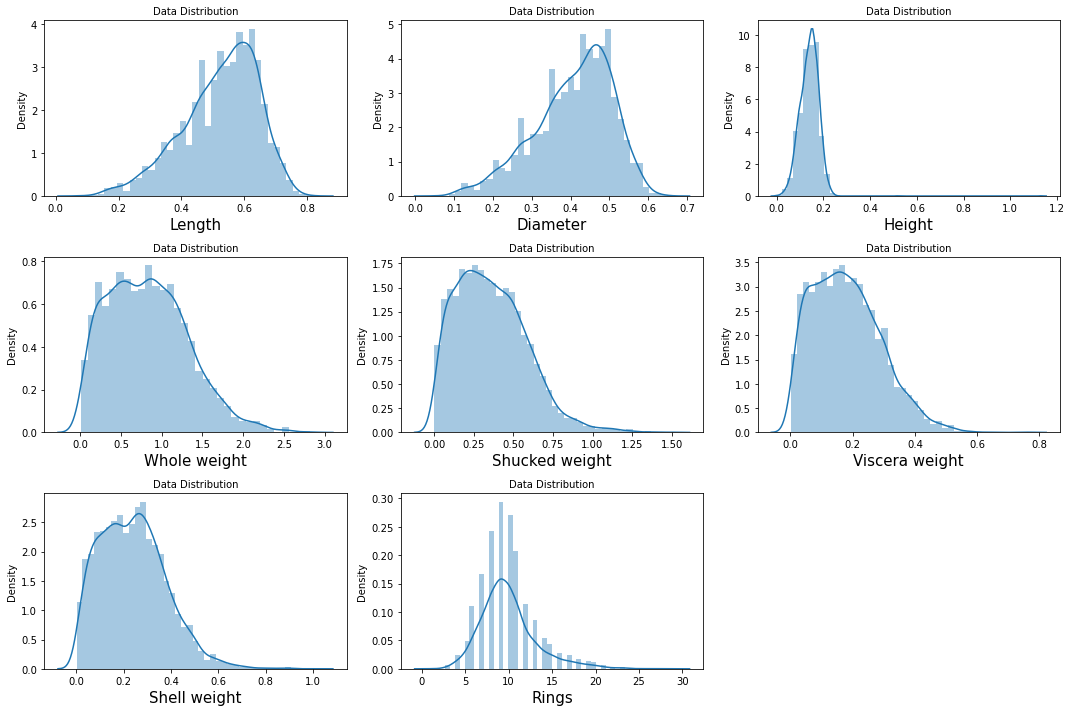

In [16]:
#Plotting distplot to see the data

plt.figure(figsize = [15,10])
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [16]:
#With the above distribution it seems like there is lot of skewness in the data which we will remove with the help of quantile method

In [17]:
#Skewness found in columns
#1 . Shell weight
#2 . Height
#3 . Whole weight
#4 . Shucked weight
#5 . Viscera weight

In [17]:
q = data['Height'].quantile(0.97)
new_data = data[data['Height']<q]

q = new_data['Whole weight'].quantile(0.99)
new_data = new_data[new_data['Whole weight']<q]


q = new_data['Shell weight'].quantile(0.98)
new_data = new_data[new_data['Shell weight']<q]


q = new_data['Shucked weight'].quantile(0.99)
new_data = new_data[new_data['Shucked weight']<q]


q = new_data['Viscera weight'].quantile(0.99)
new_data = new_data[new_data['Viscera weight']<q]

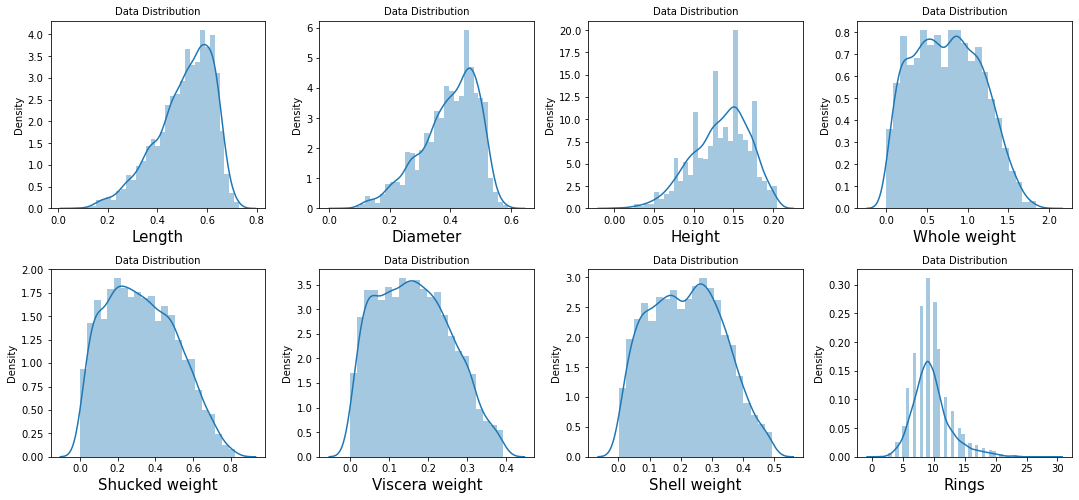

In [18]:
#Plotting again to see the data distribution


plt.figure(figsize = [15,10])
plotnumber = 1

for column in new_data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

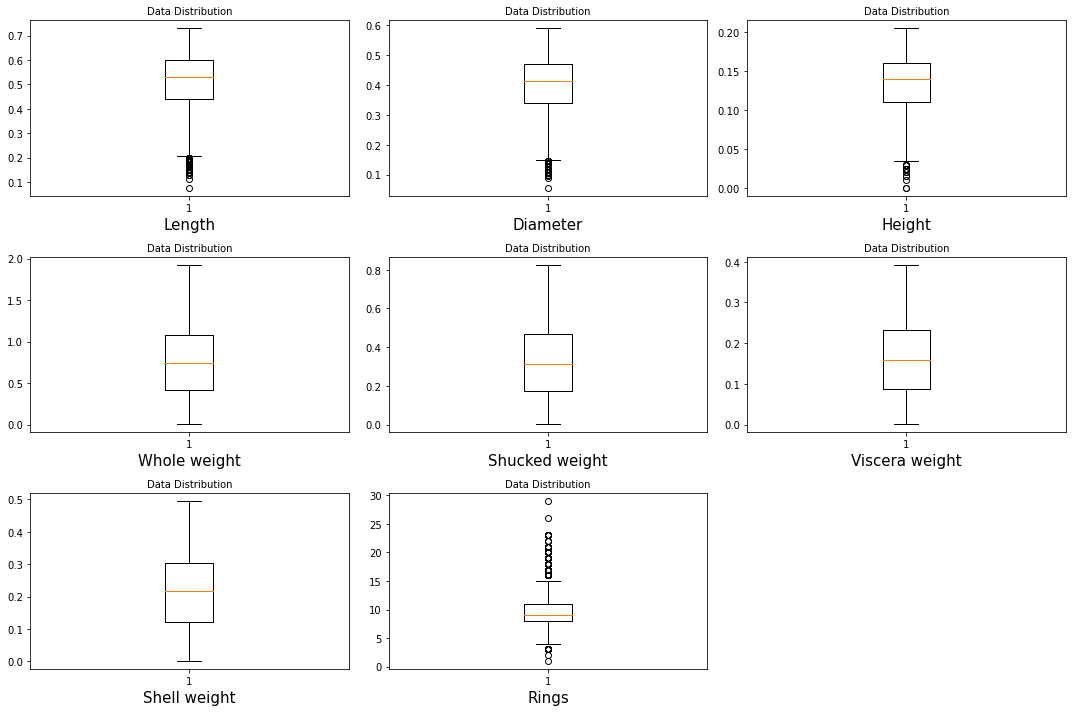

In [19]:
#Plotting box plot to check for outliers

plt.figure(figsize = [15,10])
plotnumber = 1

for column in new_data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        plt.boxplot(new_data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [22]:
#Now finding the correlation between features

In [20]:
corr_mat = new_data.corr()
corr_mat

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.985991,0.896737,0.935446,0.909667,0.907514,0.915176,0.544450
Diameter,0.985991,1.000000,0.902650,0.936376,0.905969,0.905533,0.923123,0.561980
Height,0.896737,0.902650,1.000000,0.887547,0.837169,0.865436,0.894183,0.595326
Whole weight,0.935446,0.936376,0.887547,1.000000,0.970713,0.965915,0.958647,0.530700
Shucked weight,0.909667,0.905969,0.837169,0.970713,1.000000,0.927496,0.892076,0.414723
Viscera weight,0.907514,0.905533,0.865436,0.965915,0.927496,1.000000,0.915753,0.498029
Shell weight,0.915176,0.923123,0.894183,0.958647,0.892076,0.915753,1.000000,0.612459
Rings,0.544450,0.561980,0.595326,0.530700,0.414723,0.498029,0.612459,1.000000


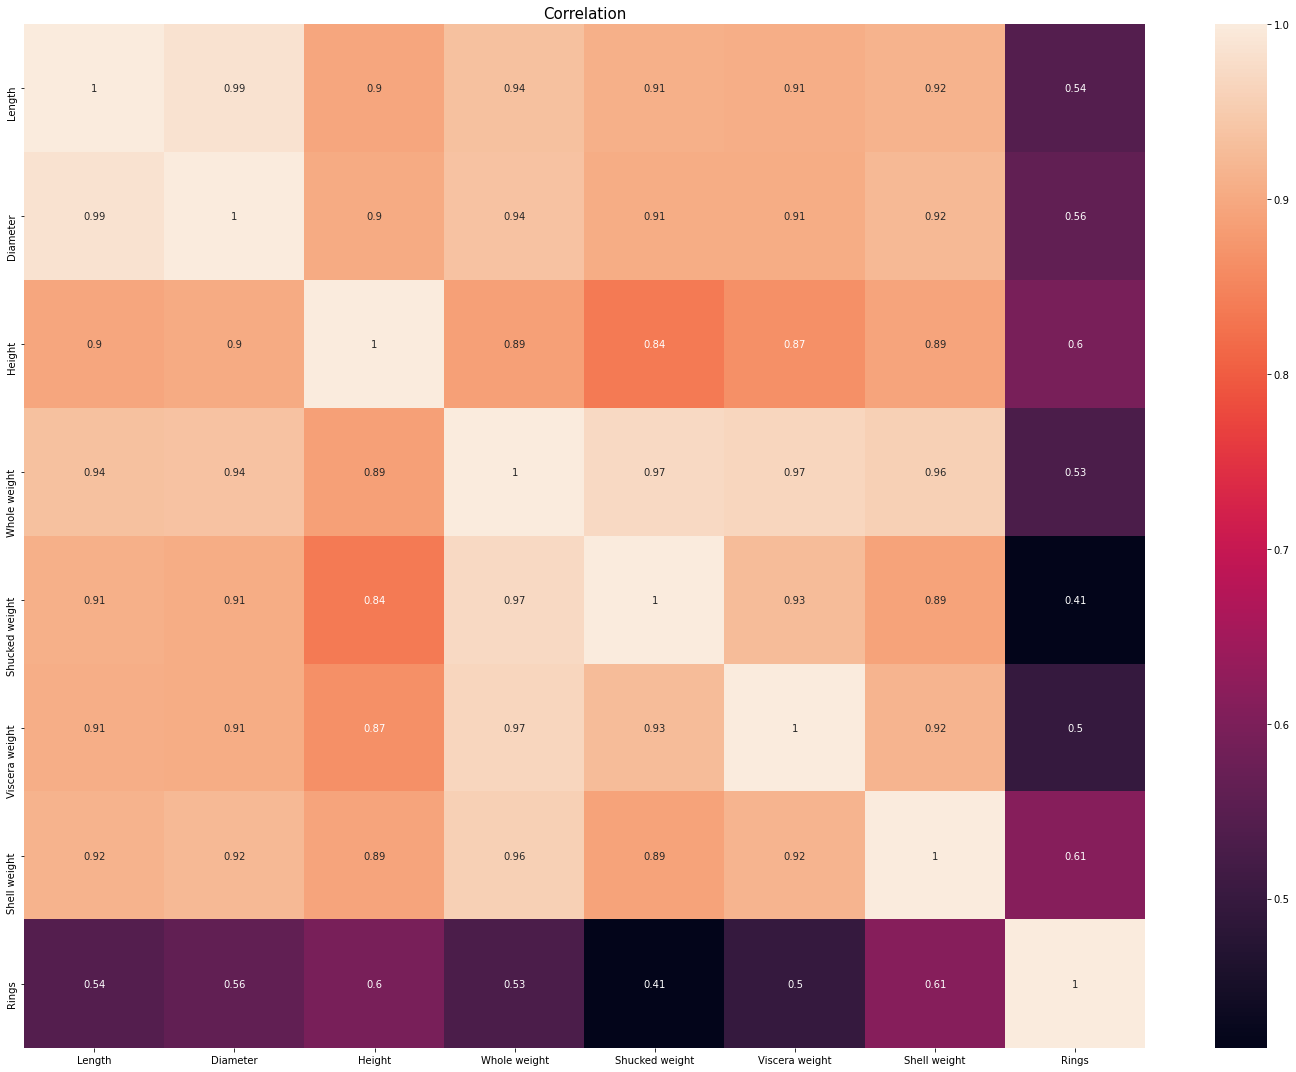

In [21]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation', fontsize=15)
plt.tight_layout()

In [22]:
# With the above observation we can see that shell weight is corelated with other features too.

<Figure size 720x1080 with 0 Axes>

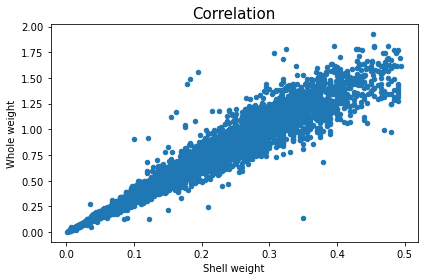

In [36]:
plt.figure(figsize=(10,15), facecolor='white')
new_data.plot.scatter(x = 'Shell weight',y = 'Whole weight')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

In [37]:
#With above observation we find that whole weight is too corelated with other features too hence we will drop it

In [38]:
new_data.drop('Whole weight', axis =1, inplace = True)

In [39]:
corr_mat = new_data.corr()
corr_mat['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.612459
Height            0.595326
Diameter          0.561980
Length            0.544450
Viscera weight    0.498029
Shucked weight    0.414723
Name: Rings, dtype: float64

In [40]:
new_data.head()

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.0895,0.0395,0.055,7


In [41]:
new_data.describe()

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
count,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000
mean,0.510625,0.396846,0.134384,0.325763,0.163829,0.216787,9.686513
std,0.114179,0.094390,0.035513,0.186577,0.093106,0.116312,3.075831
min,0.075000,0.055000,0.000000,0.001000,0.000500,0.001500,1.000000
25%,0.440000,0.340000,0.110000,0.173500,0.087000,0.120000,8.000000
50%,0.530000,0.415000,0.140000,0.312000,0.159000,0.216000,9.000000
75%,0.600000,0.470000,0.160000,0.466500,0.232500,0.305000,11.000000
max,0.730000,0.590000,0.205000,0.825500,0.392500,0.494500,29.000000


In [44]:
#Now the data looks perfect we will now scale the data

In [45]:
#Scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
#Separating label and features

x = new_data.drop(['Rings'], axis = 1)
y = new_data['Rings']

In [49]:
x_scaled = scaler.fit_transform(x)

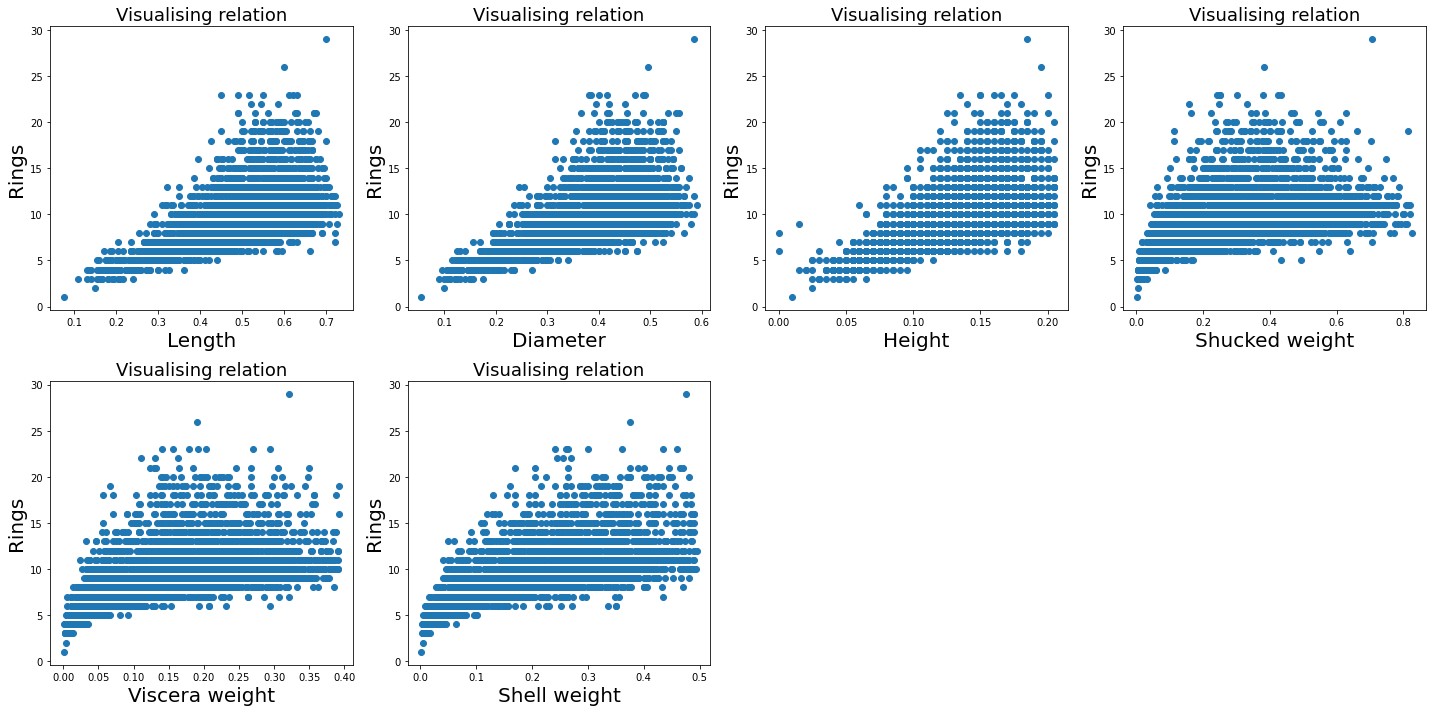

In [56]:
#Scatter Plot to find how the features are related with label

plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Rings', fontsize = 20)
        plt.title('Visualising relation', fontsize = 18)
    
    plotnumber +=1
plt.tight_layout()
plt.savefig('Visualisation of data.jpg')

In [57]:
#Splitting the data into train and test

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.22, random_state = 300)

In [52]:
#Model Building

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [115]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [64]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
print("All scores Captured")

All scores Captured


In [65]:
lr.score(x_test,y_test)

0.45774261208786626

In [66]:
dt.score(x_test,y_test)

0.2134946147003266

In [67]:
rf.score(x_test,y_test)

0.5027684034066142

In [69]:
y_pred1=lr.predict(x_test)
y_pred2 =dt.predict(x_test)
y_pred3=rf.predict(x_test)

In [70]:
mean_squared_error(y_test,y_pred1)

5.294177086544081

In [71]:
mean_squared_error(y_test,y_pred2)

7.678823529411765

In [72]:
mean_squared_error(y_test,y_pred3)

4.854580470588235

In [74]:
#With the above calculations we found that RandomForest Regressor works best for this model since the Adjusted r2 is highest and mean squared error is the least for it.

In [75]:
##Doing hyper parameter tuning for it

In [111]:
from sklearn.model_selection import GridSearchCV

In [116]:
params = {'n_estimators':[110,100],
         'criterion':['mse','mae'],
         'max_depth':[21,18],
         'min_samples_leaf': [5,7],
         'min_samples_split': [8,6]}

In [117]:
grid = GridSearchCV(rf, param_grid= params, cv= 4, n_jobs=-1)

In [118]:
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [21, 18],
                         'min_samples_leaf': [5, 7],
                         'min_samples_split': [8, 6],
                         'n_estimators': [110, 100]})

In [119]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'mse', 'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 100}


In [120]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [121]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=7, min_samples_split=8)

In [122]:
y_pred =  clf.predict(x_test)

In [123]:
mean_squared_error(y_test,y_pred)

4.899910413499274

In [126]:
clf.score(x_test,y_test)

0.4981254728745734

In [124]:
## After hyperparameter tunining we did not find much difference.